In [1]:
import pandas as pd
df=pd.read_csv('BreastCancer.csv')

In [2]:
df.head()

,id,Clump,CellSize,CellShape,MarginalAdhesion,EpithelialCellSize,BareNuc,BlandChromatin,NormalNucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  699 non-null    int64 
 1   Clump               699 non-null    int64 
 2   CellSize            699 non-null    int64 
 3   CellShape           699 non-null    int64 
 4   MarginalAdhesion    699 non-null    int64 
 5   EpithelialCellSize  699 non-null    int64 
 6   BareNuc             699 non-null    object
 7   BlandChromatin      699 non-null    int64 
 8   NormalNucleoli      699 non-null    int64 
 9   Mitoses             699 non-null    int64 
 10  Class               699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [4]:
df=df[pd.to_numeric(df['BareNuc'],errors='coerce').notnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  683 non-null    int64 
 1   Clump               683 non-null    int64 
 2   CellSize            683 non-null    int64 
 3   CellShape           683 non-null    int64 
 4   MarginalAdhesion    683 non-null    int64 
 5   EpithelialCellSize  683 non-null    int64 
 6   BareNuc             683 non-null    object
 7   BlandChromatin      683 non-null    int64 
 8   NormalNucleoli      683 non-null    int64 
 9   Mitoses             683 non-null    int64 
 10  Class               683 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 64.0+ KB


In [5]:
df['BareNuc']=df['BareNuc'].astype('int')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   id                  683 non-null    int64
 1   Clump               683 non-null    int64
 2   CellSize            683 non-null    int64
 3   CellShape           683 non-null    int64
 4   MarginalAdhesion    683 non-null    int64
 5   EpithelialCellSize  683 non-null    int64
 6   BareNuc             683 non-null    int32
 7   BlandChromatin      683 non-null    int64
 8   NormalNucleoli      683 non-null    int64
 9   Mitoses             683 non-null    int64
 10  Class               683 non-null    int64
dtypes: int32(1), int64(10)
memory usage: 61.4 KB


In [7]:
df.isnull()

,id,Clump,CellSize,CellShape,MarginalAdhesion,EpithelialCellSize,BareNuc,BlandChromatin,NormalNucleoli,Mitoses,Class
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
694,False,False,False,False,False,False,False,False,False,False,False
695,False,False,False,False,False,False,False,False,False,False,False
696,False,False,False,False,False,False,False,False,False,False,False
697,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

id                    0
Clump                 0
CellSize              0
CellShape             0
MarginalAdhesion      0
EpithelialCellSize    0
BareNuc               0
BlandChromatin        0
NormalNucleoli        0
Mitoses               0
Class                 0
dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [10]:
import numpy as np

In [11]:
x=df.iloc[:,:-1].values
x

array([[1000025,       5,       1, ...,       3,       1,       1],
       [1002945,       5,       4, ...,       3,       2,       1],
       [1015425,       3,       1, ...,       3,       1,       1],
       ...,
       [ 888820,       5,      10, ...,       8,      10,       2],
       [ 897471,       4,       8, ...,      10,       6,       1],
       [ 897471,       4,       8, ...,      10,       4,       1]],
      dtype=int64)

In [12]:
y=df.iloc[:,-1].values
label_mapping = {2: 0, 4: 1}
y_label = [label_mapping[i] for i in y]
y=np.array(y_label)
y

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,

In [13]:
# Split the dataset into training and testing sets
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
# Perform feature extraction and dimensionality reduction using an ANN model
#ann = MLPClassifier(hidden_layer_sizes=(10,),max_iter=500, random_state=42)
#ann.fit(X_train, y_train)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
ann_model = Sequential([
    Dense(25, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(15, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
ann_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = ann_model.fit(X_train, y_train, epochs=250, batch_size=50, validation_split=0.2, verbose=1)


C:\Users\SRI SHIKA.L\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - accuracy: 0.7340 - loss: 0.6980 - val_accuracy: 0.6979 - val_loss: 0.6847
Epoch 2/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8306 - loss: 0.6235 - val_accuracy: 0.7500 - val_loss: 0.6130
Epoch 3/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8577 - loss: 0.5492 - val_accuracy: 0.8229 - val_loss: 0.5260
Epoch 4/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9115 - loss: 0.4542 - val_accuracy: 0.8646 - val_loss: 0.4332
Epoch 5/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9366 - loss: 0.3559 - val_accuracy: 0.8958 - val_loss: 0.3471
Epoch 6/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9503 - loss: 0.2767 - val_accuracy: 0.9167 - val_loss: 0.2794
Epoch 7/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9422 - loss: 0.2292 - val_accuracy: 0.9375 - val_loss: 0.2313
Epoch 8/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9677 - loss: 0.1655 - val_accuracy: 0.9479 - val_loss

In [27]:
X_train_ann = ann_model.predict(X_train)
X_test_ann = ann_model.predict(X_test)
X_train_combined = np.hstack((X_train, X_train_ann.reshape(-1,1)))
X_test_combined = np.hstack((X_test, X_test_ann.reshape(-1,1)))


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [28]:
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_combined, y_train)

SVC(kernel='linear', random_state=42)

In [29]:
# Evaluate the performance of the combined model
y_train_pred = svm.predict(X_train_combined)
y_test_pred = svm.predict(X_test_combined)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print('Training accuracy:', train_accuracy)
print('Testing accuracy:', test_accuracy)
print('Training precision:', train_precision)
print('Testing precision:', test_precision)
print('Training recall:', train_recall)
print('Testing recall:', test_recall)
print('Training F1 score:', train_f1)
print('Testing F1 score:', test_f1)

Training accuracy: 0.9895397489539749
Testing accuracy: 0.975609756097561
Training precision: 0.9875
Testing precision: 0.974025974025974
Training recall: 0.9813664596273292
Testing recall: 0.9615384615384616
Training F1 score: 0.9844236760124611
Testing F1 score: 0.967741935483871


In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

<Axes: >

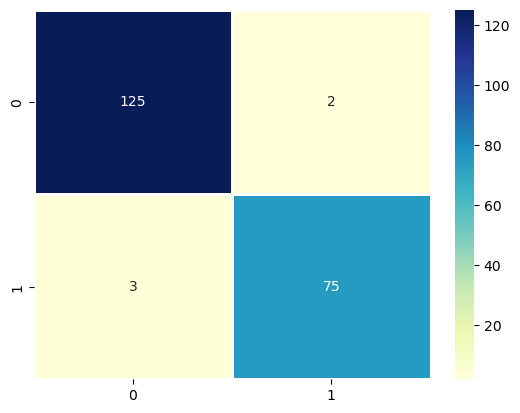

In [31]:
cm=confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm,annot=True,fmt="",cmap='YlGnBu',linewidths=0.90)

In [32]:
from sklearn.metrics import classification_report
cm=classification_report(y_test,y_test_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       127
           1       0.97      0.96      0.97        78

    accuracy                           0.98       205
   macro avg       0.98      0.97      0.97       205
weighted avg       0.98      0.98      0.98       205



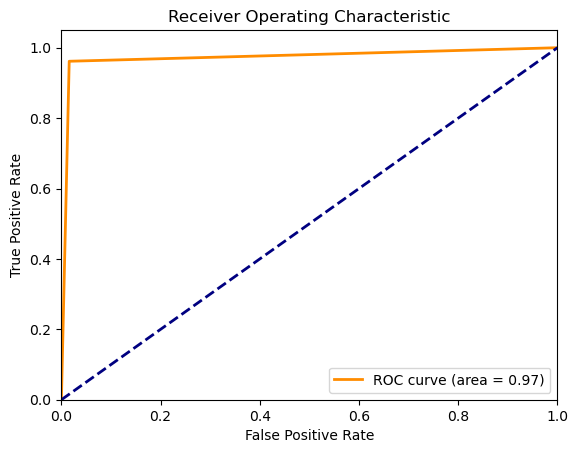

In [33]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
